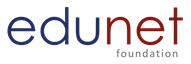

# Edunet Foundation : Class Room Exercises

# Lab 13: Connect MySQL DB using Python

## Objective: 

The objective of this lab on Connecting MySQL DB using Python is to enable learners to interact with MySQL databases programmatically, allowing them to perform database operations seamlessly within their Python applications. By the end of this lesson, you will be able to:

- Install and configure the necessary Python libraries to connect to a MySQL database.
- Establish a connection to a MySQL database using Python.
- Execute basic SQL operations (CRUD - Create, Read, Update, Delete) using Python.
- Close database connections properly to maintain database integrity and performance.

This knowledge will empower learners to integrate database functionality into their Python applications, enabling efficient data management and retrieval.

In [12]:
#!pip install mysql-connector-python

**Creating a Database**      
To create a database in MySQL, use the "CREATE DATABASE" statement:

In [1]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="1234"
)

mycursor = mydb.cursor()

mycursor.execute("CREATE DATABASE mydatabase")

If the above code was executed with no errors, you have successfully created a database.

**Check if Database Exists**     
You can check if a database exist by listing all databases in your system by using the "SHOW DATABASES" statement:

In [2]:
import mysql.connector
conn=mysql.connector.connect(host="localhost", user="root",
                             password="1234")

c=conn.cursor()

c.execute("show databases ")

for i in c:
    print(i)

('awesome chocolates',)
('aziz',)
('information_schema',)
('mydatabase',)
('mydatabase1234',)
('mysql',)
('performance_schema',)
('southwind',)
('sql_hr',)
('sql_inventory',)
('sql_invoicing',)
('sql_store',)
('sys',)
('vsm_ato',)


**Creating a Table**      
To create a table in MySQL, use the "CREATE TABLE" statement.
Make sure you define the name of the database when you create the connection

In [4]:
import mysql.connector

db=mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="1234",
    database="aziz"
    )

c=db.cursor()

sql ='''CREATE TABLE ATAL12345(
   Rno int not null primary key,
   Name varchar(30) not null,
   Branch CHAR(10),
   Percentage FLOAT,
   Email varchar(50),
   MobileNo int)'''
c.execute(sql)

If the above code was executed with no errors, you have now successfully created a table.

**Check if Table Exists**      
You can check if a table exist by listing all tables in your database with the "SHOW TABLES" statement:

In [5]:
import mysql.connector

db=mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="1234",
    database="aziz"
    )

c=db.cursor()
c.execute("SHOW TABLES")
for i in c:
    print(i)

('atal',)
('atal1',)
('atal12345',)
('bike',)
('rng1',)
('students_info',)


**Insert Into Table**       
To fill a table in MySQL, use the "INSERT INTO" statement.

In [6]:
import mysql.connector

db=mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="1234",
    database="aziz"
    )

mycursor = db.cursor()

sql = "INSERT INTO atal12345 (Rno, Name, Branch,Percentage, Email, MobileNo) VALUES (%s, %s, %s, %s, %s, %s)"
val = ("61", "Sameera", "CSE", "72",
       "asd@gmail.com", "1234567890")

mycursor.execute(sql, val)

db.commit()

print(mycursor.rowcount, "record inserted.")

1 record inserted.


**Insert Multiple Rows**      
To insert multiple rows into a table, use the `executemany()` method.
The second parameter of the `executemany()` method is a list of tuples, containing the data you want to insert:

In [7]:
import mysql.connector

db=mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="1234",
    database="aziz"
    )

mycursor = db.cursor()

sql = "INSERT INTO atal12345 (Rno, Name, Branch, Percentage, Email, MobileNo) VALUES (%s,%s, %s, %s, %s, %s)"
val = [
 ("01", "Anju", "ECE", "56", "abc@gmail.com", "1234565432"),
 ("02", "Kanwal", "ECE", "80", "abc@gmail.com", "1234565432"),
 ("03", "Sonu", "CSE", "85", "abc@gmail.com", "1234565432"),
 ("04", "Arun", "CSE", "83", "abc@gmail.com", "1234565432"),
 ("05", "Ravi", "CSE", "78", "abc@gmail.com", "1234565432"),
 ("06", "Anjali", "CSE", "65", "abc@gmail.com", "1234565432"),
 ("07", "Kesavan", "EEE", "95", "abc@gmail.com", "1234565432"),
 ("08", "Anu", "CSE", "55", "abc@gmail.com", "1234565432"),
 ]
mycursor.executemany(sql, val)
db.commit()
print(mycursor.rowcount, "record was inserted.")

8 record was inserted.


**Select From a Table**       
To select from a table in MySQL, use the "SELECT" statement:

In [8]:
import mysql.connector

db=mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="1234",
    database="aziz"
    )

mycursor = db.cursor()

mycursor.execute("SELECT * FROM atal12345")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(1, 'Anju', 'ECE', 56.0, 'abc@gmail.com', 1234565432)
(2, 'Kanwal', 'ECE', 80.0, 'abc@gmail.com', 1234565432)
(3, 'Sonu', 'CSE', 85.0, 'abc@gmail.com', 1234565432)
(4, 'Arun', 'CSE', 83.0, 'abc@gmail.com', 1234565432)
(5, 'Ravi', 'CSE', 78.0, 'abc@gmail.com', 1234565432)
(6, 'Anjali', 'CSE', 65.0, 'abc@gmail.com', 1234565432)
(7, 'Kesavan', 'EEE', 95.0, 'abc@gmail.com', 1234565432)
(8, 'Anu', 'CSE', 55.0, 'abc@gmail.com', 1234565432)
(61, 'Sameera', 'CSE', 72.0, 'asd@gmail.com', 1234567890)


Note: We use the `fetchall()` method, which fetches all rows from the last executed statement.

**Select With a Filter**       
When selecting records from a table, you can filter the selection by using the "WHERE" statement:

In [9]:
import mysql.connector

db=mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="1234",
    database="aziz"
    )

mycursor = db.cursor()

sql = "SELECT * FROM atal12345 WHERE branch = 'ECE'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(1, 'Anju', 'ECE', 56.0, 'abc@gmail.com', 1234565432)
(2, 'Kanwal', 'ECE', 80.0, 'abc@gmail.com', 1234565432)


**Delete Record**      
You can delete records from an existing table by using the "DELETE FROM" statement:

In [10]:
import mysql.connector

db=mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="1234",
    database="aziz"
    )

mycursor = db.cursor()

sql = "DELETE FROM atal12345 WHERE Name = 'Anu'"

mycursor.execute(sql)

db.commit()

print(mycursor.rowcount, "record(s) deleted")

1 record(s) deleted


Important!: Notice the statement: `mydb.commit()`. It is required to make the changes, otherwise no changes are made to the table.

<center><h1> Happy Learning